In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random

In [29]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [30]:
x_train=x_train/255.0
x_test=x_test/255.0

In [31]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [32]:
classes=['Airplane','Automobile','Bird','cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [33]:
model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
history=model.fit(x_train,y_train,epochs=20,batch_size=128,validation_split=0.1,verbose=1)

Epoch 1/20
352/352 [==============================] - 11s 31ms/step - loss: 1.3393 - accuracy: 0.5202 - val_loss: 1.4432 - val_accuracy: 0.4874
Epoch 2/20
352/352 [==============================] - 8s 22ms/step - loss: 1.3166 - accuracy: 0.5288 - val_loss: 1.4393 - val_accuracy: 0.4916
Epoch 3/20
352/352 [==============================] - 8s 22ms/step - loss: 1.2957 - accuracy: 0.5380 - val_loss: 1.4289 - val_accuracy: 0.4996
Epoch 4/20
352/352 [==============================] - 8s 24ms/step - loss: 1.2678 - accuracy: 0.5478 - val_loss: 1.3951 - val_accuracy: 0.5088
Epoch 5/20
352/352 [==============================] - 9s 27ms/step - loss: 1.2451 - accuracy: 0.5566 - val_loss: 1.4042 - val_accuracy: 0.5118
Epoch 6/20
352/352 [==============================] - 8s 22ms/step - loss: 1.2241 - accuracy: 0.5614 - val_loss: 1.3854 - val_accuracy: 0.5124
Epoch 7/20
352/352 [==============================] - 9s 26ms/step - loss: 1.2026 - accuracy: 0.5704 - val_loss: 1.3810 - val_accuracy: 0.527

In [38]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print(f"Accuracy: {test_acc*100:.2f}%")

Accuracy: 50.61%


In [45]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


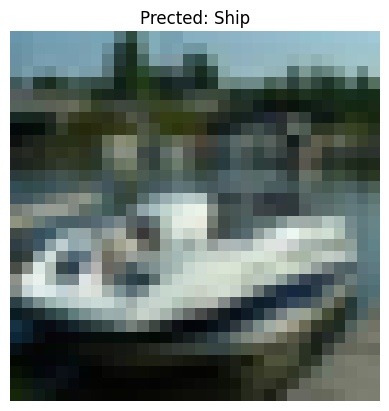

In [49]:
idx=random.randint(0,len(x_test)-1)
plt.imshow(x_test[idx],cmap='gray')
plt.title(f"Prected: {classes[np.argmax(predictions[idx])]}")
plt.axis('off')
plt.show()

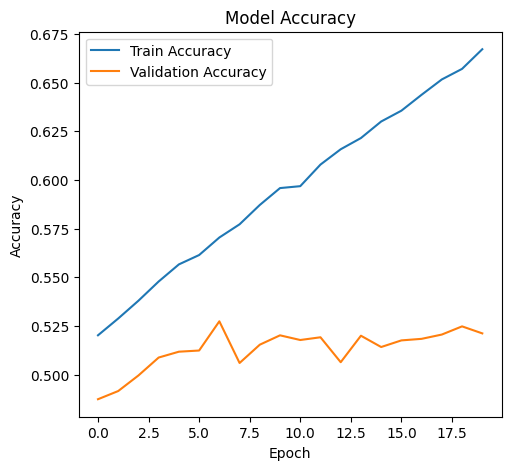

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

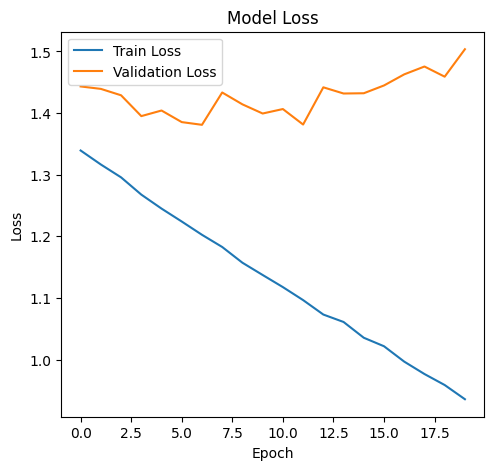

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()